In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
og_data = pd.read_csv("cleaned_wonder.csv")

In [3]:
og_data.head(2)

,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile,age_midpoint
0,Opium,T40.0,2001,2001,Female,F,White,2106-3,40-44 years,40-44,5,1783717,0.280314,1,42.0
1,Opium,T40.0,2003,2003,Female,F,Black or African American,2054-5,25-29 years,25-29,5,330059,1.514881,1,27.0


In [4]:
SE1_Raw = "Multiple Cause of Death, 2018-2021, Single Race (SE1).txt"
SE2_Raw = "Multiple Cause of Death, 2018-2021, Single Race (SE2).txt"
SE3_Raw = "Multiple Cause of Death, 2018-2021, Single Race (SE3).txt"
SE4_Raw = "Multiple Cause of Death, 2018-2021, Single Race (SE4).txt"
SE5_Raw = "Multiple Cause of Death, 2018-2021, Single Race (SE5).txt"

In [5]:
SE1_data = pd.read_csv(SE1_Raw, sep='\t', skipfooter=428, engine='python')
SE2_data = pd.read_csv(SE2_Raw, sep='\t', skipfooter=228, engine='python')
SE3_data = pd.read_csv(SE3_Raw, sep='\t', skipfooter=138, engine='python')
SE4_data = pd.read_csv(SE4_Raw, sep='\t', skipfooter=128, engine='python')
SE5_data = pd.read_csv(SE5_Raw, sep='\t', skipfooter=105, engine='python')

In [6]:
def filter_years(df):
    df = df[df['Year'] == 2021]
    return df

SE1_data = filter_years(SE1_data)
SE2_data = filter_years(SE2_data)
SE3_data = filter_years(SE3_data)
SE4_data = filter_years(SE4_data)
SE5_data = filter_years(SE5_data)

In [7]:
SE1_data['socioec quintile'] = 1.0
SE2_data['socioec quintile'] = 2.0
SE3_data['socioec quintile'] = 3.0
SE4_data['socioec quintile'] = 4.0
SE5_data['socioec quintile'] = 5.0

In [8]:
dataframes = [SE1_data, SE2_data, SE3_data, SE4_data, SE5_data]
df_2021 = pd.concat(dataframes)

In [9]:
print(len(df_2021))

8280


In [10]:
## Drop "Not Applicable" Rows:
df_2021 = df_2021[df_2021['Population'] != 'Not Applicable']
df_2021["Population"] = pd.to_numeric(df_2021["Population"], errors='coerce')

## Replace "Suppressed" with 5 deaths
df_2021['Crude Rate'] = np.where(df_2021["Crude Rate"] == 'Suppressed', 
                              (5 / df_2021["Population"]) * 100000, 
                              df_2021["Crude Rate"])
df_2021.loc[df_2021["Deaths"] == 'Suppressed', "Deaths"] = 5

print(len(df_2021))

6480


In [11]:
# There are no complete duplicates in the dataset, based on all columns
print(len(df_2021))
print(len(df_2021.drop_duplicates()))
df_2021.drop_duplicates(inplace=False)

6480
6480


,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Single Race 6,Single Race 6 Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
828,NaN,Opium,T40.0,2021,2021,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0,10400,Unreliable,1.0
829,NaN,Opium,T40.0,2021,2021,Female,F,American Indian or Alaska Native,1002-5,1-4 years,1-4,0,43703,Unreliable,1.0
830,NaN,Opium,T40.0,2021,2021,Female,F,American Indian or Alaska Native,1002-5,5-9 years,5-9,0,57972,Unreliable,1.0
831,NaN,Opium,T40.0,2021,2021,Female,F,American Indian or Alaska Native,1002-5,10-14 years,10-14,0,57330,Unreliable,1.0
832,NaN,Opium,T40.0,2021,2021,Female,F,American Indian or Alaska Native,1002-5,15-19 years,15-19,0,54175,Unreliable,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6614,NaN,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,60-64 years,60-64,0,31440,Unreliable,5.0
6615,NaN,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,65-69 years,65-69,0,22668,Unreliable,5.0
6616,NaN,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,70-74 years,70-74,0,15352,Unreliable,5.0
6617,NaN,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,75-79 years,75-79,0,8905,Unreliable,5.0


In [12]:
field = []
count_nulls = []
percent_nulls = []
for (value, column) in zip(df_2021.isnull().sum(), df_2021.isnull().columns):
    field.append(column)
    count_nulls.append(value)
    percent_nulls.append(value/len(df_2021))

pd.DataFrame(zip(field, count_nulls, percent_nulls), columns = ["Field", "Count of Nulls", "Percent of Total"])

,Field,Count of Nulls,Percent of Total
0,Notes,6480,1.0
1,Multiple Cause of death,0,0.0
2,Multiple Cause of death Code,0,0.0
3,Year,0,0.0
4,Year Code,0,0.0
5,Gender,0,0.0
6,Gender Code,0,0.0
7,Single Race 6,0,0.0
8,Single Race 6 Code,0,0.0
9,Five-Year Age Groups,0,0.0


In [13]:
cleaned = df_2021[(df_2021['Deaths'].isnull() == False) & (df_2021['Crude Rate'].isnull() == False)]
cleaned.drop(columns=['Notes'], inplace=True)

In [14]:
len(cleaned)

6480

In [15]:
# Define a function to calculate the midpoint of a range
def calculate_midpoint(range_str):
    if range_str == '< 1':
        return 0.5  # Assuming "< 1" corresponds to 0.5 as midpoint
    start, end = map(int, range_str.split('-'))
    return (start + end) / 2


def clean_up_age(df):
    """
    Fix the dates in the Five-Year Age Groups Code column
    Add an extra variable of ‘midpoint for age group’
    """
    cleaned = df.copy()
    print(f"current unique values in five year age code groups code column: {cleaned['Five-Year Age Groups Code'].unique()}")
    cleaned['Five-Year Age Groups Code'] = cleaned['Five-Year Age Groups'].str.extract(r'(\d+-\d+|< 1)')
    print(f"new unique values in five year age code groups code column: {cleaned['Five-Year Age Groups Code'].unique()}")
    
    # Apply the function to create a new column
    cleaned['age_midpoint'] = cleaned['Five-Year Age Groups Code'].apply(calculate_midpoint)

    print(f"new unique values with the age midpoint: {cleaned['age_midpoint'].unique()}")
    return cleaned

In [16]:
age_cleaned = clean_up_age(cleaned)

current unique values in five year age code groups code column: ['1' '1-4' '5-9' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44'
 '45-49' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84']
new unique values in five year age code groups code column: ['< 1' '1-4' '5-9' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44'
 '45-49' '50-54' '55-59' '60-64' '65-69' '70-74' '75-79' '80-84']
new unique values with the age midpoint: [ 0.5  2.5  7.  12.  17.  22.  27.  32.  37.  42.  47.  52.  57.  62.
 67.  72.  77.  82. ]


In [17]:
age_cleaned.to_csv('cleaned_wonder_2021_only.csv', index=False)

In [18]:
age_cleaned["Crude Rate"] = pd.to_numeric(age_cleaned["Crude Rate"], errors='coerce')
age_cleaned["Deaths"] = pd.to_numeric(age_cleaned["Deaths"], errors='coerce')

In [19]:
print(age_cleaned['Crude Rate'].mean())
print(age_cleaned['Crude Rate'].sum())

14.667465203361852
29921.62901485818


## Combine 2021 with Previous Years

In [20]:
## Map Races together
print("-"*60)
print(age_cleaned['Single Race 6'].unique())
print(og_data['Race'].unique())

print("-"*60)
print(age_cleaned['Single Race 6 Code'].unique())
print(og_data['Race Code'].unique())

print("-"*60)
print(set(list(zip(age_cleaned['Single Race 6 Code'], age_cleaned['Single Race 6']))))
print(set(list(zip(og_data['Race Code'], og_data['Race']))))

------------------------------------------------------------
['American Indian or Alaska Native' 'Asian' 'Black or African American'
 'Native Hawaiian or Other Pacific Islander' 'White' 'More than one race']
['White' 'Black or African American' 'American Indian or Alaska Native'
 'Asian or Pacific Islander']
------------------------------------------------------------
['1002-5' 'A' '2054-5' 'NHOPI' '2106-3' 'M']
['2106-3' '2054-5' '1002-5' 'A-PI']
------------------------------------------------------------
{('NHOPI', 'Native Hawaiian or Other Pacific Islander'), ('A', 'Asian'), ('M', 'More than one race'), ('2106-3', 'White'), ('1002-5', 'American Indian or Alaska Native'), ('2054-5', 'Black or African American')}
{('A-PI', 'Asian or Pacific Islander'), ('2106-3', 'White'), ('1002-5', 'American Indian or Alaska Native'), ('2054-5', 'Black or African American')}


In [21]:
race_map = {'White':'White', 'American Indian or Alaska Native':'American Indian or Alaska Native',   
           'Black or African American':'Black or African American', 
            'Native Hawaiian or Other Pacific Islander':'Asian or Pacific Islander',
            'Asian':'Asian or Pacific Islander',
            'More than one race': 'More than one race',
           }
race_code_map = {'2106-3':'2106-3', '1002-5': '1002-5',  
                '2054-5': '2054-5', 
                 'NHOPI':'A-PI',
                 'A':'A-PI',
                 'M':'M',
                }

In [22]:
age_cleaned['Race'] = age_cleaned['Single Race 6'].map(race_map)
age_cleaned['Race Code'] = age_cleaned['Single Race 6 Code'].map(race_code_map)

In [23]:
age_cleaned.drop(columns=['Single Race 6', 'Single Race 6 Code'], inplace=True)

In [24]:
df_old_plus_2021_list = [og_data, age_cleaned]

df_old_plus_2021 = pd.concat(df_old_plus_2021_list)

df_old_plus_2021.to_csv('cleaned_wonder_plus_2021.csv', index=False)

In [25]:
df_old_plus_2021["Crude Rate"] = pd.to_numeric(df_old_plus_2021["Crude Rate"], errors='coerce')
df_old_plus_2021["Deaths"] = pd.to_numeric(df_old_plus_2021["Deaths"], errors='coerce')

In [26]:
df_old_plus_2021

,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile,age_midpoint
0,Opium,T40.0,2001,2001,Female,F,White,2106-3,40-44 years,40-44,5,1783717,0.280314,1.0,42.0
1,Opium,T40.0,2003,2003,Female,F,Black or African American,2054-5,25-29 years,25-29,5,330059,1.514881,1.0,27.0
2,Opium,T40.0,2003,2003,Female,F,White,2106-3,40-44 years,40-44,5,1765457,0.283213,1.0,42.0
3,Opium,T40.0,2003,2003,Female,F,White,2106-3,60-64 years,60-64,5,1217522,0.410670,1.0,62.0
4,Opium,T40.0,2004,2004,Female,F,White,2106-3,40-44 years,40-44,5,1758221,0.284378,1.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6614,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,60-64 years,60-64,0,31440,NaN,5.0,62.0
6615,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,65-69 years,65-69,0,22668,NaN,5.0,67.0
6616,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,70-74 years,70-74,0,15352,NaN,5.0,72.0
6617,Other and unspecified narcotics,T40.6,2021,2021,Male,M,More than one race,M,75-79 years,75-79,0,8905,NaN,5.0,77.0


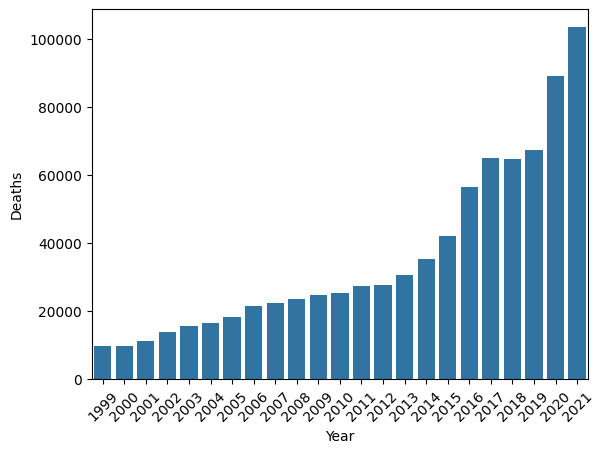

In [27]:
# Sum of Deaths over time
deaths_sum = df_old_plus_2021.groupby(['Year'])['Deaths'].sum().reset_index()

bar_deaths = sns.barplot(data=deaths_sum, x='Year', y='Deaths')

for item in bar_deaths.get_xticklabels():
    item.set_rotation(45)

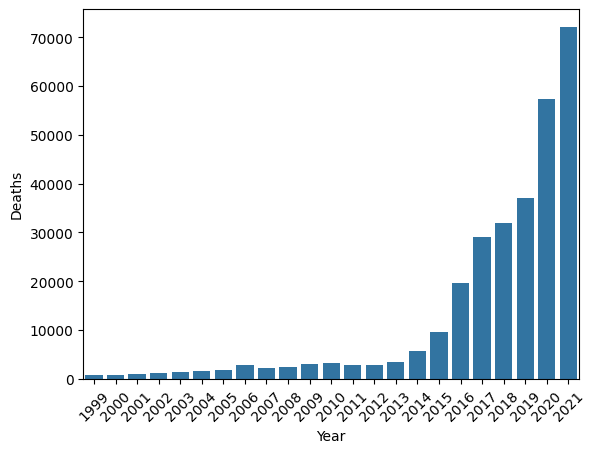

In [28]:
# Sum of Deaths over time, fentanyl
df_old_plus_2021_fentanyl = df_old_plus_2021[df_old_plus_2021['Multiple Cause of death'] == 'Other synthetic narcotics']
deaths_sum_f = df_old_plus_2021_fentanyl.groupby(['Year'])['Deaths'].sum().reset_index()

bar_deaths = sns.barplot(data=deaths_sum_f, x='Year', y='Deaths')

for item in bar_deaths.get_xticklabels():
    item.set_rotation(45)

In [29]:
crude_rate_mean = df_old_plus_2021.groupby(['Year', 'Multiple Cause of death'])['Crude Rate'].mean().reset_index()

[Text(0.5, 1.0, 'Multiple COD Over Time')]

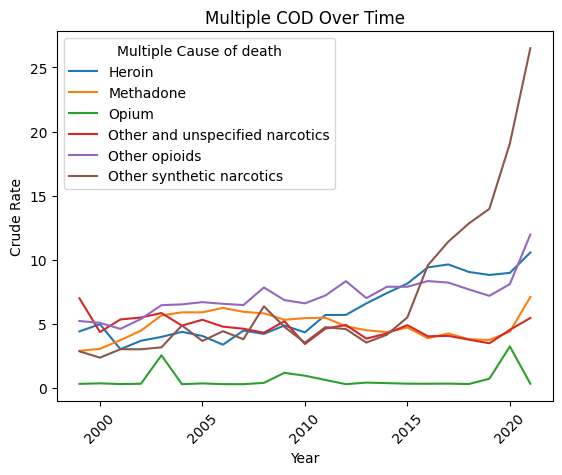

In [30]:
# Sum of Deaths over time
COD_Code = sns.lineplot(data=crude_rate_mean, x='Year', y='Crude Rate', hue='Multiple Cause of death')

for item in COD_Code.get_xticklabels():
    item.set_rotation(45)
title = 'Multiple COD Over Time'

COD_Code.set(title=title)

[Text(0.5, 1.0, 'Multiple COD Over Time')]

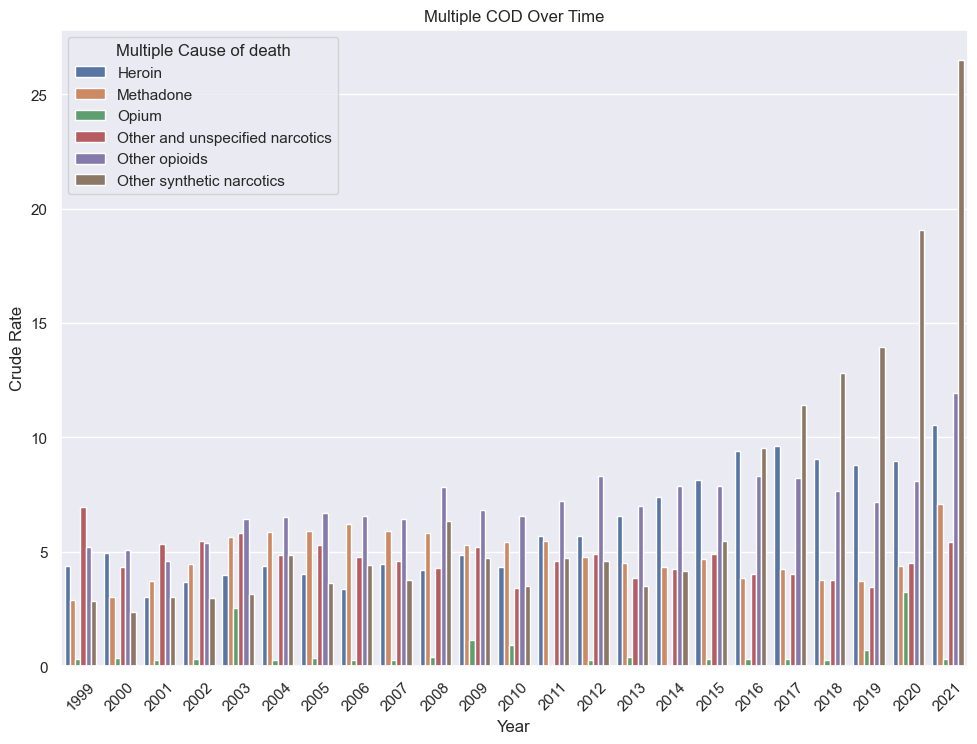

In [31]:
# Sum of Deaths over time
sns.set(rc={'figure.figsize':(11.7,8.27)})
COD_Code_Bar = sns.barplot(data=crude_rate_mean, x='Year', y='Crude Rate', hue='Multiple Cause of death')

for item in COD_Code_Bar.get_xticklabels():
    item.set_rotation(45)
title = 'Multiple COD Over Time'

COD_Code_Bar.set(title=title)